In [1]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import pandas as pd

from datetime import datetime, timedelta

from keras.models import Sequential
from keras.layers import LSTM, Dense
import pandas as pd 

import yaml
import matplotlib.pyplot as plt
import numpy as np

import os

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\comp

# DATA VISUALIZATION

In [2]:
d = pd.read_csv('energy_cons_dataset\DAYTON_hourly.csv')
d.head()


,Datetime,DAYTON_MW
0,2004-12-31 01:00:00,1596.0
1,2004-12-31 02:00:00,1517.0
2,2004-12-31 03:00:00,1486.0
3,2004-12-31 04:00:00,1469.0
4,2004-12-31 05:00:00,1472.0


In [3]:
d.describe()

,DAYTON_MW
count,121275.000000
mean,2037.851140
std,393.403153
min,982.000000
25%,1749.000000
50%,2009.000000
75%,2279.000000
max,3746.000000


In [4]:
d.isnull().sum()   # checking nulll values 

Datetime     0
DAYTON_MW    0
dtype: int64

In [5]:
#converting into datetime object
d['Datetime']=pd.to_datetime(d['Datetime'])
d.head()

,Datetime,DAYTON_MW
0,2004-12-31 01:00:00,1596.0
1,2004-12-31 02:00:00,1517.0
2,2004-12-31 03:00:00,1486.0
3,2004-12-31 04:00:00,1469.0
4,2004-12-31 05:00:00,1472.0


In [6]:
d = d.groupby('Datetime', as_index=False)['DAYTON_MW'].mean()
d.sort_values('Datetime', inplace=True)

In [7]:
d.describe()

,DAYTON_MW
count,121271.000000
mean,2037.871556
std,393.392846
min,982.000000
25%,1749.000000
50%,2009.000000
75%,2279.000000
max,3746.000000


In [8]:
d1=d
d1.head()

,Datetime,DAYTON_MW
0,2004-10-01 01:00:00,1621.0
1,2004-10-01 02:00:00,1536.0
2,2004-10-01 03:00:00,1500.0
3,2004-10-01 04:00:00,1434.0
4,2004-10-01 05:00:00,1489.0


In [9]:
d1["New_Date"] = pd.to_datetime(d1["Datetime"]).dt.date
d1["New_Time"] = pd.to_datetime(d1["Datetime"]).dt.time

In [10]:
d1.head()

,Datetime,DAYTON_MW,New_Date,New_Time
0,2004-10-01 01:00:00,1621.0,2004-10-01,01:00:00
1,2004-10-01 02:00:00,1536.0,2004-10-01,02:00:00
2,2004-10-01 03:00:00,1500.0,2004-10-01,03:00:00
3,2004-10-01 04:00:00,1434.0,2004-10-01,04:00:00
4,2004-10-01 05:00:00,1489.0,2004-10-01,05:00:00


In [11]:
d1[d1["DAYTON_MW"] == d1["DAYTON_MW"].max()]   #max energy consumptiom

,Datetime,DAYTON_MW,New_Date,New_Time
24992,2007-08-08 15:00:00,3746.0,2007-08-08,15:00:00


In [12]:
d1[d1["DAYTON_MW"] == d1["DAYTON_MW"].min()] 

,Datetime,DAYTON_MW,New_Date,New_Time
34665,2008-09-14 18:00:00,982.0,2008-09-14,18:00:00


In [13]:
import seaborn as sns
d1["Year"] = pd.DatetimeIndex(d['New_Date']).year
d1.head(1)

,Datetime,DAYTON_MW,New_Date,New_Time,Year
0,2004-10-01 01:00:00,1621.0,2004-10-01,01:00:00,2004


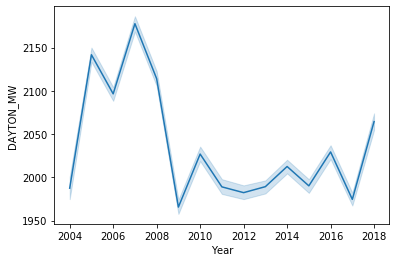

In [14]:
sns.lineplot(x=d1["Year"],y=d1["DAYTON_MW"], data=d1)

# LSTM

In [15]:
y = d["DAYTON_MW"].tolist()

In [16]:
print(y)
print(len(y))

[1621.0, 1536.0, 1500.0, 1434.0, 1489.0, 1620.0, 1859.0, 2007.0, 2025.0, 2067.0, 2117.0, 2136.0, 2149.0, 2165.0, 2163.0, 2149.0, 2130.0, 2072.0, 2020.0, 2054.0, 2075.0, 1998.0, 1869.0, 1700.0, 1554.0, 1465.0, 1417.0, 1380.0, 1386.0, 1420.0, 1499.0, 1593.0, 1686.0, 1781.0, 1839.0, 1825.0, 1793.0, 1750.0, 1724.0, 1726.0, 1708.0, 1690.0, 1681.0, 1728.0, 1766.0, 1697.0, 1590.0, 1477.0, 1389.0, 1312.0, 1284.0, 1267.0, 1263.0, 1287.0, 1326.0, 1388.0, 1482.0, 1563.0, 1599.0, 1625.0, 1632.0, 1617.0, 1593.0, 1600.0, 1609.0, 1628.0, 1653.0, 1772.0, 1865.0, 1783.0, 1675.0, 1566.0, 1493.0, 1443.0, 1431.0, 1423.0, 1472.0, 1619.0, 1895.0, 2065.0, 2089.0, 2113.0, 2165.0, 2157.0, 2162.0, 2179.0, 2152.0, 2127.0, 2104.0, 2093.0, 2076.0, 2169.0, 2220.0, 2087.0, 1937.0, 1766.0, 1658.0, 1588.0, 1543.0, 1539.0, 1577.0, 1710.0, 1980.0, 2142.0, 2144.0, 2148.0, 2156.0, 2151.0, 2144.0, 2151.0, 2138.0, 2107.0, 2101.0, 2080.0, 2065.0, 2147.0, 2205.0, 2097.0, 1946.0, 1795.0, 1678.0, 1596.0, 1569.0, 1564.0, 1601.0,

In [37]:
def lag_matrix(d, lag):
    
    X, Y = [], []
    
    for i in range(len(d) -lag ):
        end_ix= i + lag
        
        #if end_ix > len(d)-1:
         #   break
        
        
        seq_x, seq_y = d[i:end_ix], d[end_ix]
        X.append(seq_x)
        Y.append(seq_y)
        
        dataX, dataY = np.array(X), np.array(Y)
        
        
        
    
    return dataX, dataY


In [33]:
'''
def lag_matrix(ts, lag):
    
        X, Y = [], []

        
        for i in range(len(ts) - lag):
            Y.append(ts[i + lag])
            X.append(ts[i:(i + lag)])

        X, Y = np.array(X), np.array(Y)

        # Reshaping the X array to an LSTM input shape 
        #X = np.reshape(X, (X.shape[0], X.shape[1], 1))

        return X, Y  
'''

In [38]:
#TEsting on smaller values 

t=[1,2,3,4,5,6,7,8,9,10]
lag=3

x,y=lag_matrix(t,lag)

print(x) , print(y)

[[1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]
 [6 7 8]
 [7 8 9]]
[ 4  5  6  7  8  9 10]


(None, None)

In [39]:
# Reshaping the X array to an LSTM input shape 
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [40]:
print(X)

[[[1]
  [2]
  [3]]

 [[2]
  [3]
  [4]]

 [[3]
  [4]
  [5]]

 [[4]
  [5]
  [6]]

 [[5]
  [6]
  [7]]

 [[6]
  [7]
  [8]]

 [[7]
  [8]
  [9]]]


In [19]:
x.shape

(7, 3)

In [20]:
#lag=24
#y = d["DAYTON_MW"].tolist()
#x , y =lag_matrix(y,lag)
#print(x) , print(y)

In [21]:
# Reshaping the X array to an LSTM input shape 
#[samples , timesteps ]  to  [samples , timesteps , features ]
 # Converts into 3D

X = np.reshape(x, (x.shape[0], x.shape[1], 1))
X.shape

(7, 3, 1)

In [22]:
#create_data_for_NN(d, "DAYTON_MW" , 6)

In [120]:
class TSF_LSTM():
    
    
    def __init__(
        self, 
        data: pd.DataFrame, 
        Y_var: str,
        lag: int,
        LSTM_layer_depth: int, 
        epochs=10, 
        batch_size=256,
        train_test_split=0
    ):

        self.data = data 
        self.Y_var = Y_var 
        self.lag = lag 
        self.LSTM_layer_depth = LSTM_layer_depth
        self.batch_size = batch_size
        self.epochs = epochs
        self.train_test_split = train_test_split

          
    
    @staticmethod
    def lag_matrix(ts, lag):
    
        X, Y = [], []
        if len(ts) - lag <= 0:
            X.append(ts)
        else:
            for i in range(len(ts) - lag):
                Y.append(ts[i + lag])
                X.append(ts[i:(i + lag)])

        X, Y = np.array(X), np.array(Y)

        # Reshaping the X array to an LSTM input shape 
        X = np.reshape(X, (X.shape[0], X.shape[1], 1))

        return X, Y         
       
        

    def create_data_for_NN(self,use_last_n=None):
        
        # Extracting the main variable we want to model/forecast
        y = self.data[self.Y_var].tolist()

        # Subseting the time series if needed
        #if use_last_n is not None:
            #y = y[-use_last_n:]

        # The X matrix will hold the lags of Y 
        X, Y = self.lag_matrix(y, self.lag)

        # Creating training and test sets 
        X_train = X
        X_test = []

        Y_train = Y
        Y_test = []

        if self.train_test_split > 0:
            index = round(len(X) * self.train_test_split)
            X_train = X[:(len(X) - index)]
            X_test = X[-index:]     
            
            Y_train = Y[:(len(X) - index)]
            Y_test = Y[-index:]
        

        return X_train, X_test, Y_train, Y_test

    def LSTModel(self):
        X_train, X_test, Y_train, Y_test = self.create_data_for_NN()
        model = Sequential()
        
        
        #input_shape(lag , n_features )
        #layer depth = 50
        
        model.add(LSTM(self.LSTM_layer_depth, activation='relu', input_shape=(self.lag, 1)))
        model.add(Dense(1))  #output node .. 1 output needed only
        model.compile(optimizer='adam', loss='mse')

        # Defining the model parameter dict 
        # for whole dataset / n step ahead prediction
        dict_ = {'x': X_train,'y': Y_train,'batch_size': self.batch_size,'epochs': self.epochs,'shuffle': False}
        
        #for forecast on test set 
        if self.train_test_split > 0:
            dict_.update({'validation_data': (X_test, Y_test)})

        
        model.fit(**dict_) 
        self.model = model

        return model

    def predict(self):
       
        yhat = []

        if(self.train_test_split > 0):
            X_train, X_test, Y_train, Y_test = self.create_data_for_NN()   
            #prediction list
            yhat = [y[0] for y in self.model.predict(X_test)]

        return yhat

    def predict_n_ahead(self, n_ahead: int):
          
        X, _, _, _ = self.create_data_for_NN(use_last_n=self.lag)        

     
        yhat = []

        for _ in range(n_ahead):
        
            fc = self.model.predict(X)
            yhat.append(fc)

            
            X = np.append(X, fc)
            X = np.delete(X, 0)

            
            X = np.reshape(X, (1, len(X), 1))

        return yhat    

          
    



In [46]:
#Initializing constructor 

deep_learner = TSF_LSTM(
data = d,
Y_var = 'DAYTON_MW',
lag = 24, # 24 past hours are used
LSTM_layer_depth = 50,
epochs = 10,
batch_size = 256,
train_test_split = 0.15
)





#Fitting model 
model = deep_learner.LSTModel()


Train on 103060 samples, validate on 18187 samples
Epoch 1/10
103060/103060 [==============================] - 28s 274us/step - loss: 294902.5500 - val_loss: 28375.1220
Epoch 2/10
103060/103060 [==============================] - 25s 241us/step - loss: 130259.2019 - val_loss: 346805.5302
Epoch 3/10
103060/103060 [==============================] - 24s 231us/step - loss: 89323.7700 - val_loss: 67003.7443
Epoch 4/10
103060/103060 [==============================] - 23s 220us/step - loss: 62409.5020 - val_loss: 60363.0969
Epoch 5/10
103060/103060 [==============================] - 24s 230us/step - loss: 57465.6437 - val_loss: 54017.3383
Epoch 6/10
103060/103060 [==============================] - 23s 225us/step - loss: 51135.0778 - val_loss: 47120.4198
Epoch 7/10
103060/103060 [==============================] - 23s 227us/step - loss: 44656.7578 - val_loss: 40971.6103
Epoch 8/10
103060/103060 [==============================] - 23s 224us/step - loss: 37412.9791 - val_loss: 32179.3488
Epoch 9/10

In [47]:
 
lag_model = 24
# Getting the last period
ts = d['DAYTON_MW'].tail(lag_model).values.tolist()
ts


[1789.0,
 1717.0,
 1632.0,
 1605.0,
 1604.0,
 1684.0,
 1820.0,
 1927.0,
 2023.0,
 2107.0,
 2226.0,
 2315.0,
 2429.0,
 2525.0,
 2576.0,
 2594.0,
 2626.0,
 2624.0,
 2600.0,
 2554.0,
 2481.0,
 2405.0,
 2250.0,
 2042.0]

In [49]:
#d.tail(24)

In [55]:
#predictions

pred = deep_learner.predict()
pred

[1710.143,
 1754.5789,
 1778.7218,
 1804.3333,
 1960.6882,
 2030.772,
 2075.5793,
 2152.5134,
 2195.7478,
 2274.725,
 2386.299,
 2391.515,
 2379.1016,
 2366.957,
 2402.4644,
 2434.535,
 2624.599,
 2707.9817,
 2673.5142,
 2571.2974,
 2411.341,
 2245.7773,
 1922.6783,
 1839.9812,
 1860.0812,
 1873.6702,
 1945.7404,
 1964.0435,
 2033.2063,
 2154.404,
 2248.9702,
 2249.0005,
 2259.337,
 2302.5225,
 2364.348,
 2442.9,
 2489.5076,
 2511.5295,
 2537.188,
 2567.6077,
 2875.1702,
 2839.8794,
 2732.848,
 2537.9397,
 2550.3762,
 2136.9817,
 1951.2797,
 1946.3325,
 1884.9603,
 1950.4026,
 1962.1227,
 1993.4232,
 2103.6099,
 2188.6304,
 2228.8374,
 2312.3032,
 2351.9634,
 2438.6624,
 2509.5261,
 2530.4756,
 2527.8096,
 2473.4248,
 2542.016,
 2507.6514,
 2506.623,
 2448.3384,
 2342.0964,
 2285.782,
 2144.458,
 2059.8435,
 1954.773,
 1928.1451,
 1912.0634,
 1881.6375,
 1968.4271,
 1917.8148,
 1998.272,
 2036.9429,
 2096.777,
 2182.7695,
 2199.3525,
 2227.1587,
 2234.6223,
 2235.7986,
 2247.3423,
 225

In [56]:
len(pred)

18187

In [57]:
X_tr, X_te, Y_tr, Y_te= deep_learner.create_data_for_NN()
Y_te

array([1580., 1587., 1650., ..., 2405., 2250., 2042.])

In [58]:
len(Y_te)

18187

# ERROR METRIC 

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

def mean_absolute_percentage_error(y_true, y_pred): 
    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(mean_absolute_percentage_error(Y_te , pred))


6.496241721079777


In [70]:
rmse = sqrt(mean_squared_error(Y_te , pred))
print(rmse)
print(Y_te.mean())

161.6690113510043
2028.6802111398251


In [71]:
print(mean_absolute_error(Y_te , pred))

130.27914482238774


# Plot

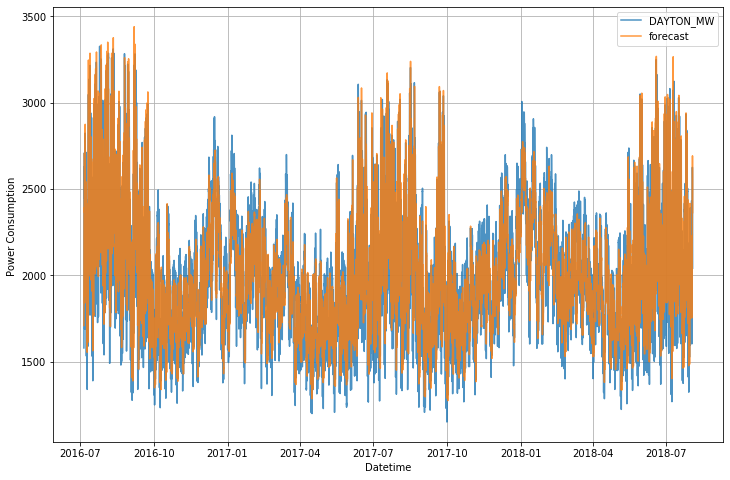

In [82]:

fc = d.tail(len(pred)).copy()
#print(fc) -- > these are Y_te values 

fc.reset_index(inplace=True)
fc['forecast'] = pred

#dataframe made 

# Ploting the forecasts
plt.figure(figsize=(12, 8))
for dtype in ['DAYTON_MW', 'forecast']:
  plt.plot(
    'Datetime',
    dtype,
    data=fc,
    label=dtype,
    alpha=0.8
  )

plt.xlabel("Datetime")
plt.ylabel("Power Consumption ")
plt.legend()
plt.grid()
plt.show()


In [83]:
fc

,index,Datetime,DAYTON_MW,New_Date,New_Time,Year,forecast
0,103084,2016-07-06 04:00:00,1580.0,2016-07-06,04:00:00,2016,1710.142944
1,103085,2016-07-06 05:00:00,1587.0,2016-07-06,05:00:00,2016,1754.578857
2,103086,2016-07-06 06:00:00,1650.0,2016-07-06,06:00:00,2016,1778.721802
3,103087,2016-07-06 07:00:00,1761.0,2016-07-06,07:00:00,2016,1804.333252
4,103088,2016-07-06 08:00:00,1913.0,2016-07-06,08:00:00,2016,1960.688232
...,...,...,...,...,...,...,...
18182,121266,2018-08-02 20:00:00,2554.0,2018-08-02,20:00:00,2018,2692.473389
18183,121267,2018-08-02 21:00:00,2481.0,2018-08-02,21:00:00,2018,2644.191650
18184,121268,2018-08-02 22:00:00,2405.0,2018-08-02,22:00:00,2018,2554.933594
18185,121269,2018-08-02 23:00:00,2250.0,2018-08-02,23:00:00,2018,2464.136475


# n-step ahead

In [107]:
#Testing on a smaller portion  


'''
small= pd.DataFrame()
small=d.head(10)
small
#d
#small['Date'] = d['Datetime']


,Datetime,DAYTON_MW,New_Date,New_Time,Year
0,2004-10-01 01:00:00,1621.0,2004-10-01,01:00:00,2004
1,2004-10-01 02:00:00,1536.0,2004-10-01,02:00:00,2004
2,2004-10-01 03:00:00,1500.0,2004-10-01,03:00:00,2004
3,2004-10-01 04:00:00,1434.0,2004-10-01,04:00:00,2004
4,2004-10-01 05:00:00,1489.0,2004-10-01,05:00:00,2004
...,...,...,...,...,...
121266,2018-08-02 20:00:00,2554.0,2018-08-02,20:00:00,2018
121267,2018-08-02 21:00:00,2481.0,2018-08-02,21:00:00,2018
121268,2018-08-02 22:00:00,2405.0,2018-08-02,22:00:00,2018
121269,2018-08-02 23:00:00,2250.0,2018-08-02,23:00:00,2018


In [119]:
'''

deep_learner2 = TSF_LSTM(
data=small,
Y_var='DAYTON_MW',
lag=3,
LSTM_layer_depth=50,
epochs=10,
train_test_split=0
)

# Getting the forecast
yhat = [y[0] for y in model.predict(X)]

deep_learner2.LSTModel()
'''

"\n\ndeep_learner2 = TSF_LSTM(\ndata=small,\nY_var='DAYTON_MW',\nlag=3,\nLSTM_layer_depth=50,\nepochs=10,\ntrain_test_split=0\n)\n\n# Getting the forecast\nyhat = [y[0] for y in model.predict(X)]\n\ndeep_learner2.LSTModel()\n"

In [118]:
# Forecasting n steps ahead
'''
n_ahead = 5
yhat = deep_learner.predict_n_ahead(n_ahead)
yhat = [y[0][0] for y in yhat]
'''

'\nn_ahead = 5\nyhat = deep_learner.predict_n_ahead(n_ahead)\nyhat = [y[0][0] for y in yhat]\n'

In [121]:
#Training on the whole dataset 

# Creating the model using full data and forecasting n steps ahead

# Constructor 
'''
deep_learner2 = TSF_LSTM(
data=d,
Y_var='DAYTON_MW',
lag=48,
LSTM_layer_depth=64,
epochs=10,
train_test_split=0
)


'''

In [ ]:
'''
fc = d.tail(400).copy() 
fc['type'] = 'original'

last_date = max(fc['Datetime'])
hat_frame = pd.DataFrame({
    'Datetime': [last_date + timedelta(hours=x + 1) for x in range(n_ahead)], 
    'DAYTON_MW': yhat,
    'type': 'forecast'
})

fc = fc.append(hat_frame)
fc.reset_index(inplace=True, drop=True)

plt.figure(figsize=(8, 4))
for col_type in ['original', 'forecast']:
    plt.plot(
        'Datetime', 
        'DAYTON_MW', 
        data=fc[fc['type']==col_type],
        label=col_type
        )
    
    
plt.xlabel("Datetime")
plt.ylabel("Power Consumption ")
plt.legend()
plt.grid()
plt.show()    
'''


# XGBOOST

In [66]:
from xgboost import plot_importance, plot_tree
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
#plt.style.use('fivethirtyeight')

In [67]:
#d = pd.read_csv('energy_cons_dataset/DAYTON_hourly.csv')

In [68]:
#d.head()

In [69]:
df = pd.read_csv('energy_cons_dataset/DAYTON_hourly.csv', index_col=[0], parse_dates=[0])

In [70]:
df.head()

,DAYTON_MW
Datetime,
2004-12-31 01:00:00,1596.0
2004-12-31 02:00:00,1517.0
2004-12-31 03:00:00,1486.0
2004-12-31 04:00:00,1469.0
2004-12-31 05:00:00,1472.0


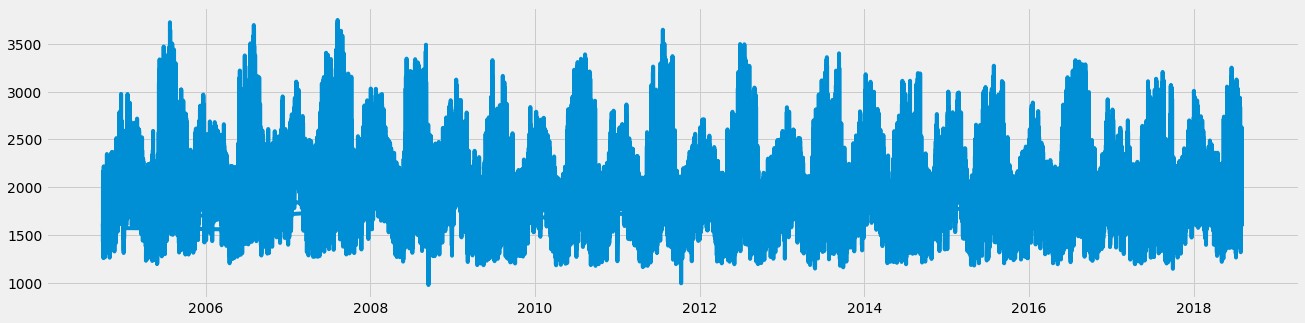

In [71]:
plt.figure(figsize=(20,5))
plt.plot(d_xg['DAYTON_MW'])

In [74]:
#Train-Test split
'''
train=df.iloc[:-31439]
test = df.iloc[-31439:]

print(train.shape)

'''
split_date = '01-Jan-2015'
train = df.loc[df.index <= split_date].copy()
test = df.loc[df.index > split_date].copy()


In [75]:
train.head()

,DAYTON_MW
Datetime,
2004-12-31 01:00:00,1596.0
2004-12-31 02:00:00,1517.0
2004-12-31 03:00:00,1486.0
2004-12-31 04:00:00,1469.0
2004-12-31 05:00:00,1472.0


#Create Time Series Features

In [76]:
def create_features(df, label=None):
    
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [77]:
X_t, y_t = create_features(train, label='DAYTON_MW')
X_te, y_te = create_features(test, label='DAYTON_MW')

In [78]:
X_te.head()

#features have been split 

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,
2015-12-31 01:00:00,1,3,4,12,2015,365,31,53
2015-12-31 02:00:00,2,3,4,12,2015,365,31,53
2015-12-31 03:00:00,3,3,4,12,2015,365,31,53
2015-12-31 04:00:00,4,3,4,12,2015,365,31,53
2015-12-31 05:00:00,5,3,4,12,2015,365,31,53


In [81]:
#xgb_r = xg.XGBRegressor(n_estimators = 100) 

In [84]:
import xgboost

In [85]:
#XGBOOst model creation 
#Regressor

# Instantiation 


#For parameter tuning .. 
#https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
#https://xgboost.readthedocs.io/en/latest/parameter.html

xgb_r = xgboost.XGBRegressor(n_estimators = 100) 

xgb_r.fit(X_t, y_t, eval_set=[(X_t, y_t), (X_te, y_te)], early_stopping_rounds=50, verbose=True) 

[0]	validation_0-rmse:1469.69849	validation_1-rmse:1433.38709
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:1041.38403	validation_1-rmse:1015.44958
[2]	validation_0-rmse:745.34314	validation_1-rmse:725.05530
[3]	validation_0-rmse:542.76776	validation_1-rmse:532.32001
[4]	validation_0-rmse:407.54275	validation_1-rmse:405.46988
[5]	validation_0-rmse:318.40253	validation_1-rmse:325.59451
[6]	validation_0-rmse:263.87518	validation_1-rmse:278.99228
[7]	validation_0-rmse:227.22482	validation_1-rmse:255.53856
[8]	validation_0-rmse:208.38097	validation_1-rmse:241.13960
[9]	validation_0-rmse:195.53952	validation_1-rmse:234.70590
[10]	validation_0-rmse:188.45827	validation_1-rmse:229.48396
[11]	validation_0-rmse:180.91635	validation_1-rmse:231.28381
[12]	validation_0-rmse:177.13605	validation_1-rmse:231.44838
[13]	validation_0-rmse:174.02022	validation_1-rmse:230

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

# Feature Importance Evaluation 

In [89]:
booster = xgb_r.get_booster()

# Get the importance dictionary (by gain) from the booster

# importance_type = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
importance = booster.get_score(importance_type="weight")


In [90]:
importance

{'hour': 665,
 'dayofyear': 1114,
 'dayofweek': 491,
 'year': 855,
 'weekofyear': 233,
 'dayofmonth': 272,
 'quarter': 23,
 'month': 47}

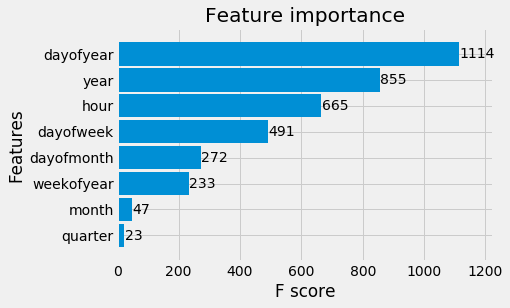

In [88]:
f_imp =plot_importance(xgb_r, height=0.9)

In [95]:
pred = xgb_r.predict(X_test)
print(pred)

[1677.1912 1681.6957 1692.7178 ... 2148.8767 2143.0103 1963.9894]


# PLOT

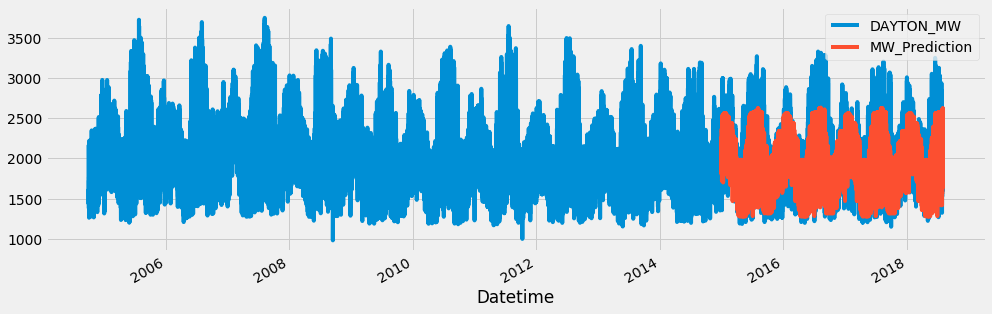

In [92]:
#Forecast on test
test['MW_Prediction'] = xgb_r.predict(X_test)
all_set = pd.concat([test, train], sort=False)
_ = all_set[['DAYTON_MW','MW_Prediction']].plot(figsize=(15, 5))

In [96]:
test.head()

,DAYTON_MW,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,MW_Prediction
Datetime,,,,,,,,,,,
2015-12-31 01:00:00,1707.0,2015-12-31 01:00:00,1,3,4,12,2015,365,31,53,1677.191162
2015-12-31 02:00:00,1652.0,2015-12-31 02:00:00,2,3,4,12,2015,365,31,53,1681.695679
2015-12-31 03:00:00,1631.0,2015-12-31 03:00:00,3,3,4,12,2015,365,31,53,1692.717773
2015-12-31 04:00:00,1618.0,2015-12-31 04:00:00,4,3,4,12,2015,365,31,53,1692.717773
2015-12-31 05:00:00,1641.0,2015-12-31 05:00:00,5,3,4,12,2015,365,31,53,1692.717773


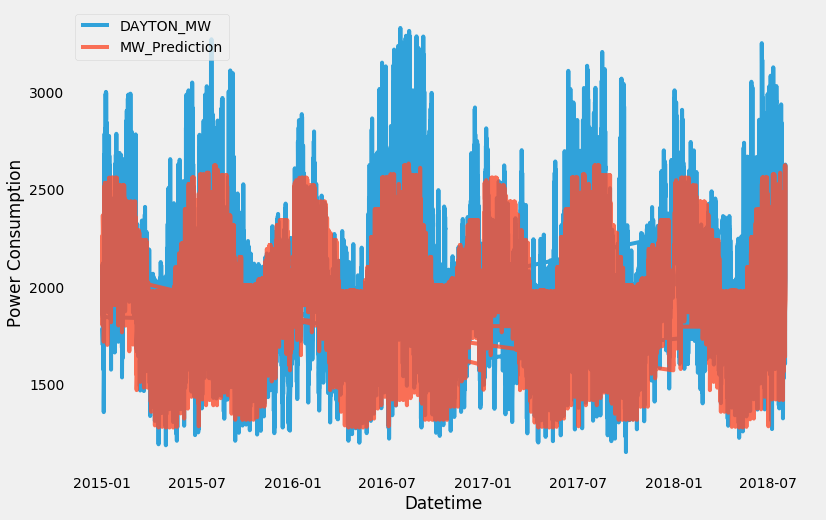

In [100]:
#fc = d.tail(len(pred)).copy()
#print(fc) -- > these are Y_te values 

test.reset_index(inplace=True)
test['forecast'] = pred

# Ploting the forecasts
plt.figure(figsize=(12, 8))
for dtype in ['DAYTON_MW', 'MW_Prediction']:
  plt.plot(
    'Datetime',
    dtype,
    data=test,
    label=dtype,
    alpha=0.8
  )

plt.xlabel("Datetime")
plt.ylabel("Power Consumption ")
plt.legend()
plt.grid()
plt.show()


In [105]:
test.head(2)

,Datetime,DAYTON_MW,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,MW_Prediction,forecast
0,2015-12-31 01:00:00,1707.0,2015-12-31 01:00:00,1,3,4,12,2015,365,31,53,1677.191162,1677.191162
1,2015-12-31 02:00:00,1652.0,2015-12-31 02:00:00,2,3,4,12,2015,365,31,53,1681.695679,1681.695679


# Error Metric

In [103]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(mean_absolute_percentage_error(test["DAYTON_MW"] ,test["forecast"]))


8.209422908408738


In [107]:
rmse = sqrt(mean_squared_error(test["DAYTON_MW"] ,test["forecast"]))
print(rmse)
print(test["DAYTON_MW"].mean())

229.48405634320468
2008.813670918286


In [108]:
print(mean_absolute_error(test["DAYTON_MW"] ,test["forecast"]))

170.28373659389263


# Worst and Best Predicted Days

In [109]:
test['error'] = test['DAYTON_MW'] - test['MW_Prediction']

test['abs_error'] = test['error'].apply(np.abs)
error_by_day = test.groupby(['year','month','dayofmonth']) \
    .mean()[['DAYTON_MW','MW_Prediction','error','abs_error']]

In [110]:
test.head(2)

,Datetime,DAYTON_MW,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,MW_Prediction,forecast,error,abs_error
0,2015-12-31 01:00:00,1707.0,2015-12-31 01:00:00,1,3,4,12,2015,365,31,53,1677.191162,1677.191162,29.808838,29.808838
1,2015-12-31 02:00:00,1652.0,2015-12-31 02:00:00,2,3,4,12,2015,365,31,53,1681.695679,1681.695679,-29.695679,29.695679


In [111]:
# Over forecasted days / Worst predictions 
error_by_day.sort_values('error', ascending=True).head(10)

DAYTON_MW  MW_Prediction       error   abs_error
year month dayofmonth                                                    
2016 7     4           1513.250000    2045.507080 -532.257095  532.257095
2015 11    26          1501.208333    1941.346802 -440.138484  440.138484
2017 2     23          1834.250000    2271.668701 -437.418671  437.418671
2015 12    25          1476.208333    1908.142334 -431.933955  431.933955
2017 1     2           1765.375000    2197.117920 -431.743011  431.743011
           21          1666.958333    2098.292969 -431.334712  431.334712
2016 2     3           1904.333333    2331.799561 -427.466217  427.466217
2017 1     22          1600.375000    2022.976807 -422.601776  422.601776
           3           1914.666667    2336.471924 -421.805181  421.805181
2018 2     20          1849.708333    2270.815430 -421.107056  421.107056

In [112]:
# Best predicted days
error_by_day.sort_values('abs_error', ascending=True).head(10)

DAYTON_MW  MW_Prediction      error  abs_error
year month dayofmonth                                                  
2016 4     30          1565.333333    1557.716553   7.616837  23.592250
2017 5     13          1533.208333    1554.229858 -21.021469  23.930272
2016 9     28          1834.708333    1842.649536  -7.941249  24.017003
2017 10    19          1836.875000    1835.956665   0.918299  25.978032
2018 5     1           1819.083333    1833.044800 -13.961421  25.986048
2015 10    21          1838.916667    1855.647461 -16.730738  26.281957
           27          1887.708333    1867.171753  20.536545  26.918330
2016 5     10          1843.416667    1833.690308   9.726344  27.007889
     11    28          1999.583333    1979.781372  19.801956  27.130712
     10    11          1823.125000    1842.566406 -19.441411  27.165105